# Exploratory Data Analysis + Handling Missing Data

`TODO`

- Group events per RunID and date
- Examine "impossible" values
- Implement Haversine formula to fill in `speed` = NaN with `Latitude` and `Longitude`
- Tidy script 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
head = 0

In [8]:
# load full data
data = pd.read_csv('processed_data/first_pass.csv')
data.head(head)

Empty DataFrame
Columns: [RunID, Time, Latitude, Longitude, Elevation, Distance, HeartRate, Cadence, Speed]
Index: []

In [9]:
# convert to datetime
data['Time'] = pd.to_datetime(data['Time'], errors = 'coerce', utc=True)

# extract the date in YYYY-MM-DD
data['Date'] = data['Time'].dt.date

In [10]:
# aggregate functions
agg_funcs = {
    'Elevation': 'mean',
    'Distance': 'max',
    'HeartRate': 'mean',
    'Cadence': 'mean',
    'Speed': 'mean'}

# aggregate data per run
data_per_run = data[['RunID', 
                     'Date', 
                     'Elevation', 
                     'Distance', 
                     'HeartRate', 
                     'Cadence', 
                     'Speed']].groupby(['RunID', 'Date']).agg(agg_funcs).reset_index()

In [11]:
data_per_run.head(head)

Empty DataFrame
Columns: [RunID, Date, Elevation, Distance, HeartRate, Cadence, Speed]
Index: []

## Descriptive Analysis: Per run

In [12]:
descriptive_stats = data_per_run.describe()
pd.set_option('display.float_format', '{:.2f}'.format)
descriptive_stats[['Elevation', 'Distance', 'HeartRate', 'Cadence', 'Speed']]

Elevation  Distance  HeartRate  Cadence  Speed
count     503.00    498.00     505.00   495.00  22.00
mean        5.87   9030.70     140.33    78.89   2.73
std        71.55   4727.50      18.14    10.77   0.29
min      -157.46      0.00      59.00    10.56   2.13
25%        -2.59   6073.95     133.87    75.10   2.58
50%         0.75   9278.95     141.16    81.86   2.72
75%         3.77  11749.33     148.52    85.72   2.90
max      1214.28  43286.20     198.66    94.05   3.42

In [13]:
data_per_run.isna().sum()

RunID          0
Date           0
Elevation      2
Distance       7
HeartRate      0
Cadence       10
Speed        483
dtype: int64

In [14]:
data[data["Distance"] == 0].head(head)

Empty DataFrame
Columns: [RunID, Time, Latitude, Longitude, Elevation, Distance, HeartRate, Cadence, Speed, Date]
Index: []

In [15]:
# two runs with no distance covered whatsoever
data_per_run[data_per_run["Distance"] == 0].head(head)

Empty DataFrame
Columns: [RunID, Date, Elevation, Distance, HeartRate, Cadence, Speed]
Index: []

In [16]:
data[data["RunID"] == 1983036631].head(head)

Empty DataFrame
Columns: [RunID, Time, Latitude, Longitude, Elevation, Distance, HeartRate, Cadence, Speed, Date]
Index: []

## Descriptive Analysis: Full

In [17]:
descriptive_stats = data.describe()
pd.set_option('display.float_format', '{:.2f}'.format)
descriptive_stats[['Elevation', 'Distance', 'HeartRate', 'Cadence', 'Speed']].head(head)

Empty DataFrame
Columns: [Elevation, Distance, HeartRate, Cadence, Speed]
Index: []

In [18]:
# Missing values
data.isna().sum()

RunID              0
Time               0
Latitude        4583
Longitude       4583
Elevation      43347
Distance       46752
HeartRate          0
Cadence        35926
Speed        1605333
Date               0
dtype: int64

In [19]:
print("Distance = 0:", len(data[data['Distance'] == 0]))
print("HeartRate = 0:", len(data[data['HeartRate'] == 0]))
print("Cadence = 0:", len(data[data['HeartRate'] == 0]))

Distance = 0: 708
HeartRate = 0: 0
Cadence = 0: 0


In [20]:
# Only one run which recorded heartRate = 0
data[data['HeartRate'] == 0]["RunID"].unique()

array([], dtype=int64)

In [21]:
# Why more than 506 runs???
data[data['Cadence'] == 0]["RunID"].unique()

array([ 1010000744,  1015556479,  1015556576,  1021048125,  1032868566,
        1040824037,  1046360239,  1054969048,  1061138029,  1061138074,
        1065041814,  1070743204,  1083928690,  1088907504,  1095168309,
        1095168312,  1095168313,  1095168314,  1100274646,  1111775344,
        1128721789,  1135115407,  1143732449,  1143732451,  1143732452,
        1143732453,  1143732456,  1143732606,  1146690219,  1151270033,
        1165891886,  1174679044, 11865003088, 11903067169, 11925754501,
       12025720775,  1204028250, 12064122577,  1208061158, 12184398876,
       12201261748, 12231823776, 12233748058, 12249284502, 12278091080,
       12305381020, 12344844634, 12352672778,  1300634788,  1311131861,
        1321874945,  1330620804,  1333621201,  1337239406,  1343945585,
        1347907211,  1353212430,  1358311402,  1373794681,  1383618836,
        1393127739,  1398003005,  1416818867,  1424281814,  1453459121,
        1459900225,  1472864011,  1513551575,  1513551919,  1519

## Time-series Analysis: Full

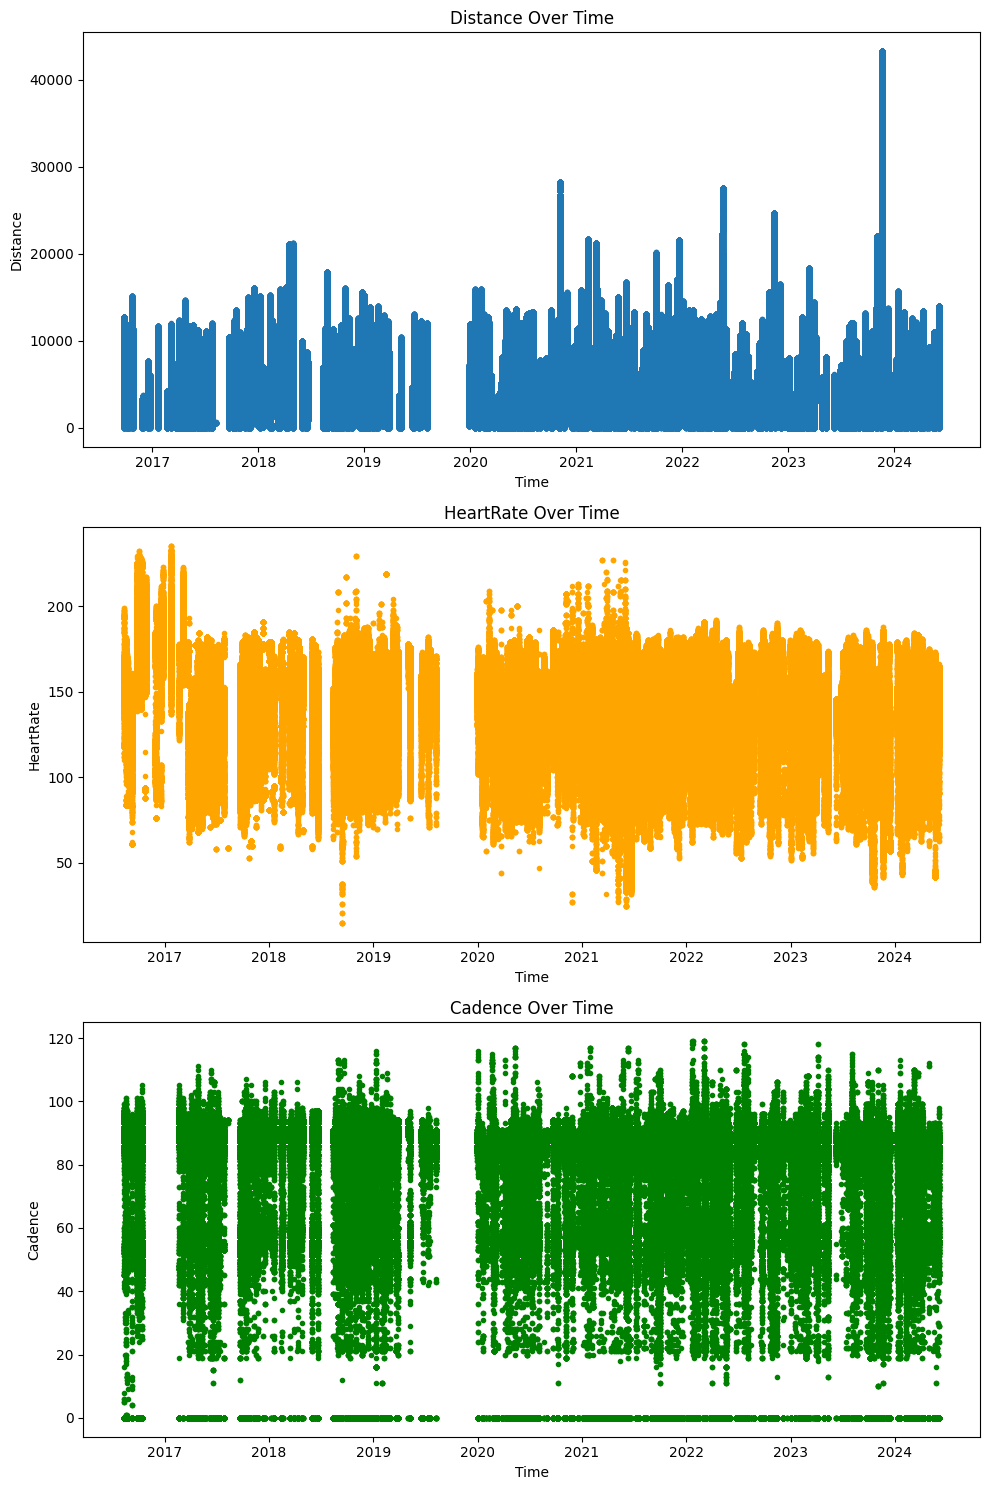

In [22]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# distance over time
ax[0].plot(data['Time'], data['Distance'], '.', label = 'Distance')
ax[0].set_title('Distance Over Time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Distance')

# heartRate over time
ax[1].plot(data['Time'], data['HeartRate'], '.', label = 'HeartRate', color = 'orange')
ax[1].set_title('HeartRate Over Time')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('HeartRate')

# cadence over time
ax[2].plot(data['Time'], data['Cadence'], '.', label = 'Cadence', color = 'green')
ax[2].set_title('Cadence Over Time')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Cadence')

plt.tight_layout()
plt.show()

## Time-series Analysis: Per run

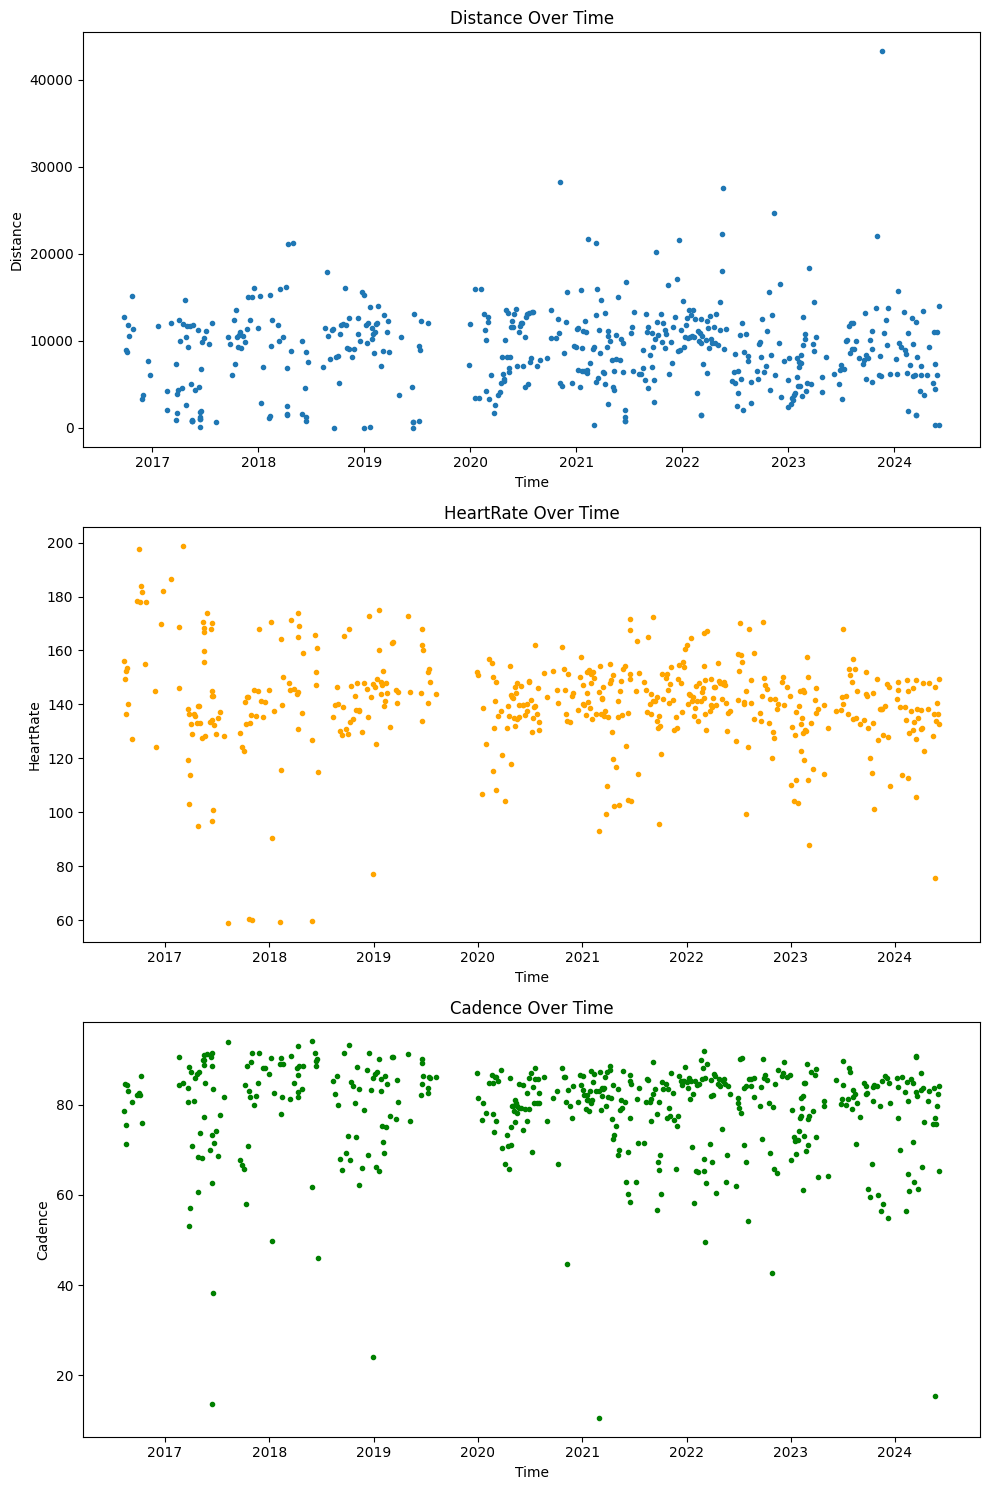

In [24]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# distance over time
ax[0].plot(data_per_run['Date'], data_per_run['Distance'], '.', label = 'Distance')
ax[0].set_title('Distance Over Time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Distance')

# heartRate over time
ax[1].plot(data_per_run['Date'], data_per_run['HeartRate'], '.', label = 'HeartRate', color = 'orange')
ax[1].set_title('HeartRate Over Time')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('HeartRate')

# cadence over time
ax[2].plot(data_per_run['Date'], data_per_run['Cadence'], '.', label = 'Cadence', color = 'green')
ax[2].set_title('Cadence Over Time')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Cadence')

plt.tight_layout()
plt.show()

In [25]:
# examine average heartrate below 75
data_per_run[data_per_run['HeartRate'] < 75]

RunID        Date  Elevation  Distance  HeartRate  Cadence  Speed
58  1241530709  2017-08-09       1.46    623.40      59.00    93.87    NaN
66  1347907211  2017-10-22      -1.34   9285.90      60.29    83.07    NaN
69  1363595103  2017-11-01       5.94   9156.00      60.00    91.40    NaN
81  1508216362  2018-02-07      -4.47   1107.10      59.33    89.07    NaN
99  1730901813  2018-06-01       1.58   1546.20      59.58    94.05    NaN

In [26]:
data[data['RunID'] == 1241530709].head(head)

Empty DataFrame
Columns: [RunID, Time, Latitude, Longitude, Elevation, Distance, HeartRate, Cadence, Speed, Date]
Index: []

## Frequency Analysis: Full

/tmp/ipykernel_7207/2707759245.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['YearMonth'] = data['Time'].dt.to_period('M')


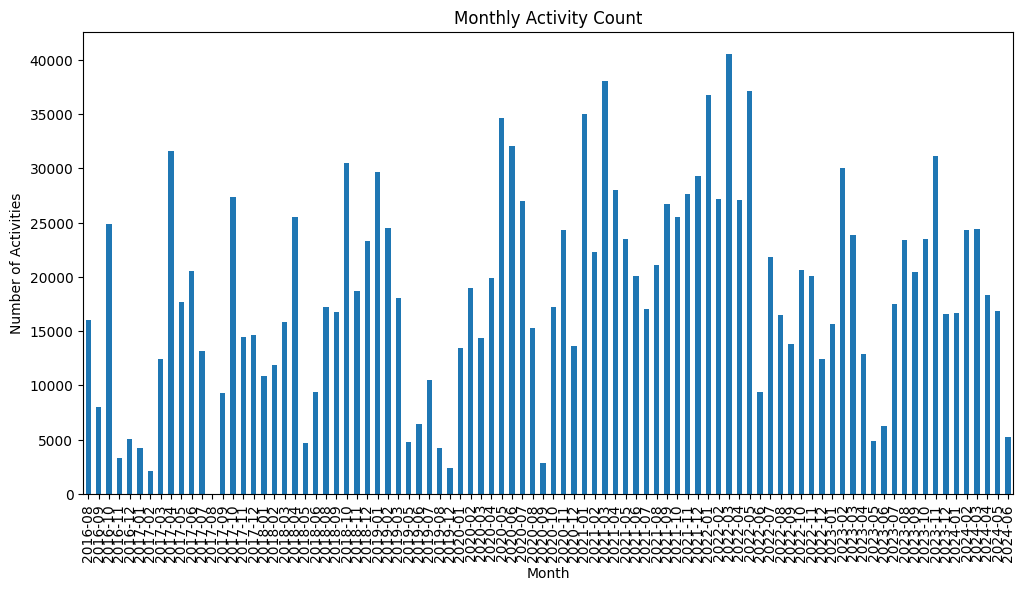

In [27]:
# extract the date part for categorical analysis
data['Date'] = data['Time'].dt.date

# extract year and month for grouping
data['YearMonth'] = data['Time'].dt.to_period('M')

# extract the day of the week for grouping
data['Weekday'] = data['Time'].dt.day_name()

# group by year and month and count activities
monthly_activity_count = data.groupby('YearMonth').size()

# group by weekday and count activities
weekday_activity_count = data.groupby('Weekday').size()

# plot monthly activity count
plt.figure(figsize=(12, 6))
monthly_activity_count.plot(kind='bar')
plt.title('Monthly Activity Count')
plt.xlabel('Month')
plt.ylabel('Number of Activities')
plt.show()

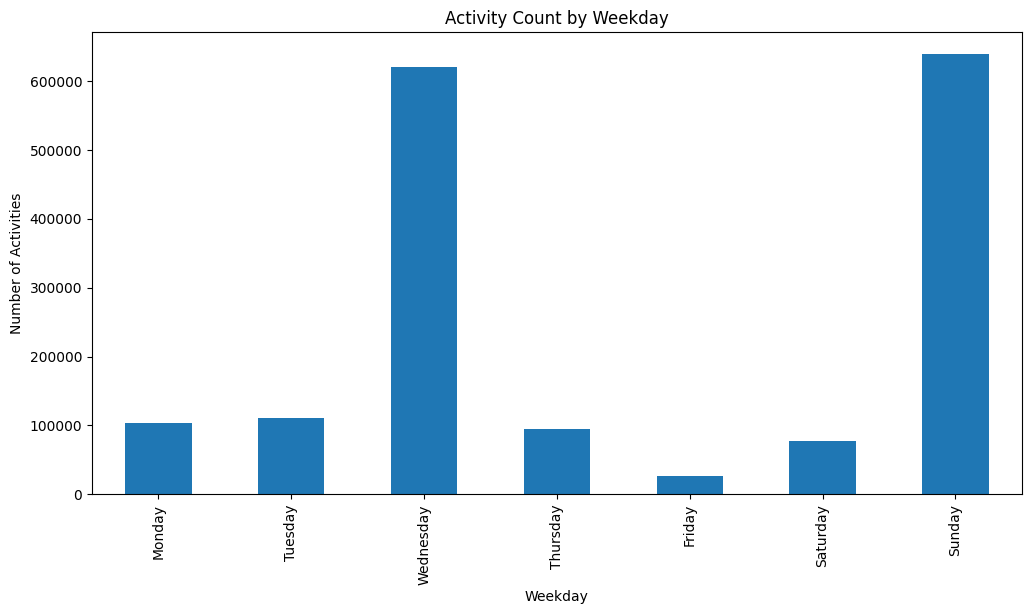

In [28]:
# to ensure the order is Monday to Sunday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_activity_count = weekday_activity_count.reindex(weekday_order)

# plot weekday activity count
plt.figure(figsize=(12, 6))
weekday_activity_count.plot(kind='bar')
plt.title('Activity Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Activities')
plt.show()

## Correlation Heatmap

TODO: Perform Haversine formula on NaN values in column `speed` to limit dropped rows.

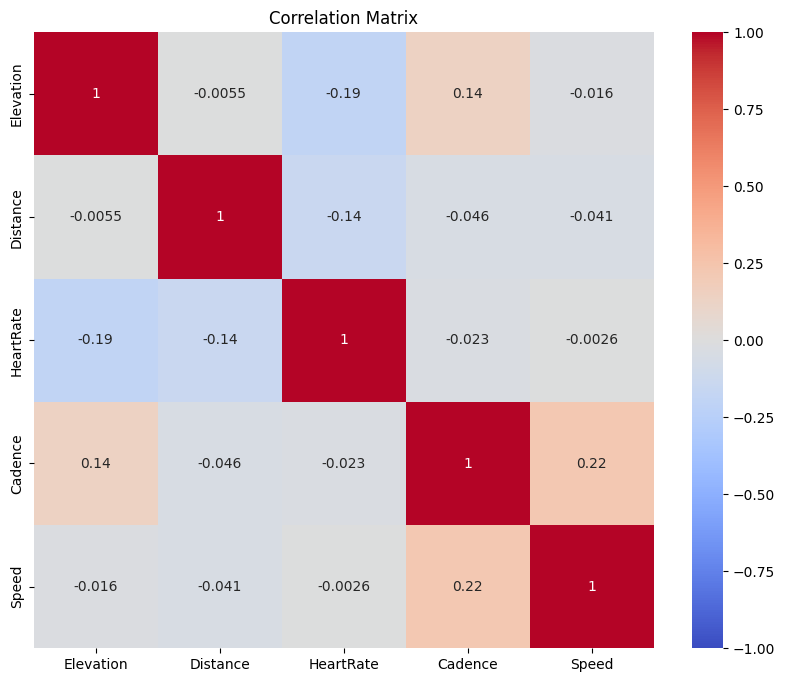

In [29]:
# drop rows with NaN values for correlation analysis
corr_data = data[['Elevation', 'Distance', 'HeartRate', 'Cadence', 'Speed']].dropna()
correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Checking outliers

Outliers defined by Z-score > 3

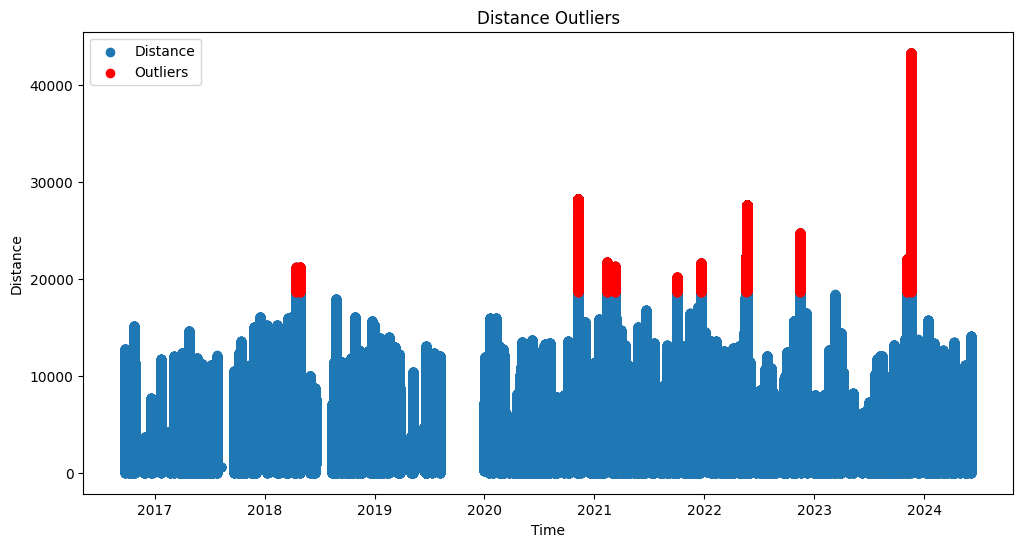

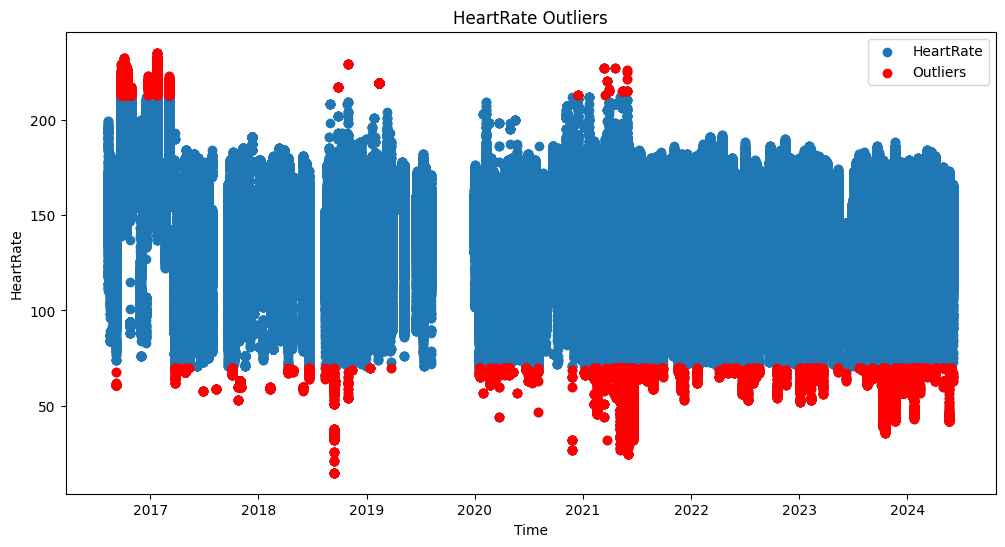

In [30]:
import numpy as np

# identify outliers in 'Distance'
distance_outliers = data[np.abs(data['Distance'] - data['Distance'].mean()) > (3 * data['Distance'].std())]

# identify outliers in 'HeartRate'
heartrate_outliers = data[np.abs(data['HeartRate'] - data['HeartRate'].mean()) > (3 * data['HeartRate'].std())]

# plot distance outliers
plt.figure(figsize=(12, 6))
plt.scatter(data['Time'], data['Distance'], label='Distance')
plt.scatter(distance_outliers['Time'], distance_outliers['Distance'], color='red', label='Outliers')
plt.title('Distance Outliers')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.legend()
plt.show()

# plot HeartRate outliers
plt.figure(figsize=(12, 6))
plt.scatter(data['Time'], data['HeartRate'], label='HeartRate')
plt.scatter(heartrate_outliers['Time'], heartrate_outliers['HeartRate'], color='red', label='Outliers')
plt.title('HeartRate Outliers')
plt.xlabel('Time')
plt.ylabel('HeartRate')
plt.legend()
plt.show()

In [31]:
distance_outliers['Distance'].unique()

array([18669.90039062, 18673.        , 18676.30078125, ...,
       24723.        , 24723.80078125, 24724.19921875])

In [32]:
heartrate_outliers['HeartRate'].unique()

array([ 62,  67,  68,  69,  70,  64,  65,  66,  58,  60,  61,  63,  59,
        56,  54,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,
        53,  55,  57,  15,  21,  26,  37,  38,  36,  35,  33,  32, 217,
       229, 219, 214, 216, 218, 215, 213, 220, 223, 226, 228, 225, 224,
       222, 221, 227, 232, 231, 230, 233, 234, 235,  41,  39,  40,  27,
        30,  28,  34,  29,  25])

## K-means Clustering

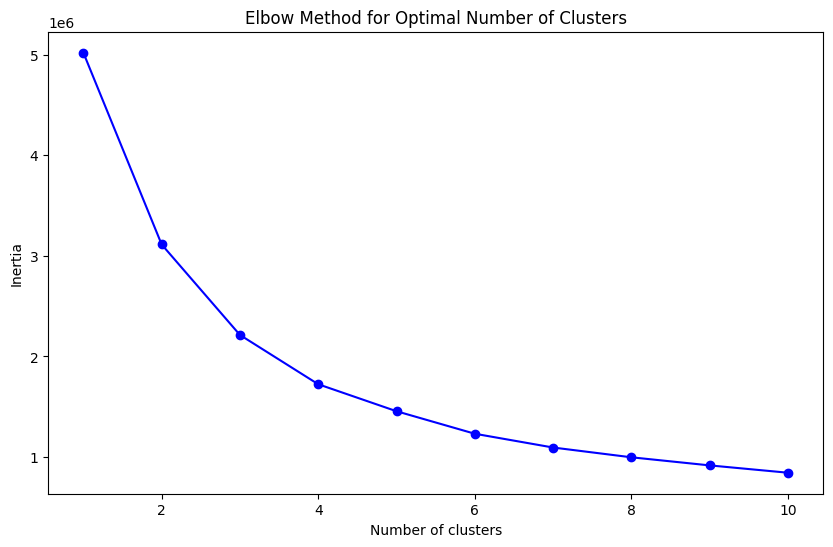

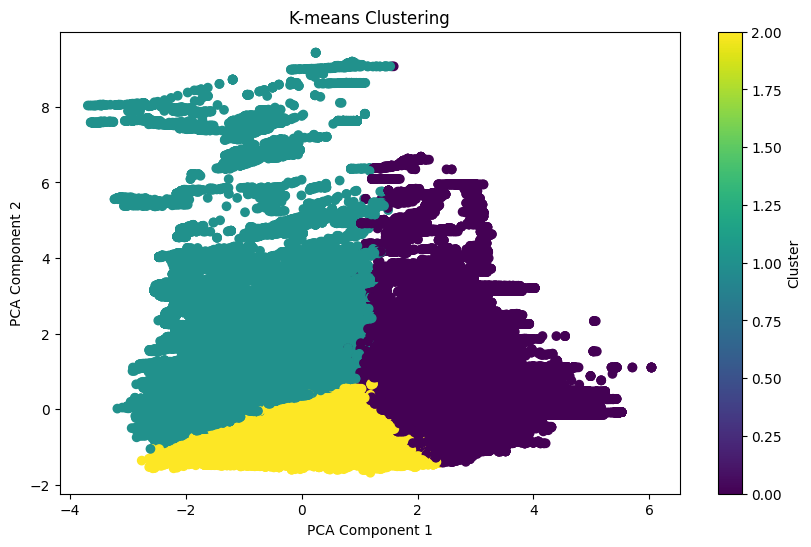

In [33]:
# select features for clustering
features = data[['Distance', 'HeartRate', 'Cadence']]

# filling missing values with the mean of the column
features = features.fillna(features.mean())

# standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# determine the optimal number of clusters (elbow method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# choose the optimal clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()